In [1]:
from mrsimulator import Simulator, SpinSystem, Site, Dimension
from mrsimulator import SymmetricTensor as st
from mrsimulator.methods import one_d_spectrum

In [2]:
import matplotlib.pyplot as plt
def plot(x, y):
    plt.figure(figsize=(4.5, 2.5))
    plt.plot(x, y, linewidth=1)
    plt.xlim([x.value.max(), x.value.min()])
    plt.xlabel(f"frequency ratio / {str(x.unit)}")
    plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.25)
    plt.tight_layout(h_pad=0, w_pad=0, pad=0)

# Wollastonite

Wollastonite is a high-temperature calcium-silicate, 𝛽−Ca$_3$Si$_3$O$_9$, with three distinct $^{29}$Si sites. The $^{29}$Si shielding tensor parameters were obtained from [Hansen et. al](https://pubs.acs.org/doi/10.1021/ic020647f).

**Step 1** Create sites.

In [3]:
S29_1 = Site(name='Q21', isotope='29Si', isotropic_chemical_shift=-89.0, shielding_symmetric={'zeta': 59.8, 'eta': 0.62})
S29_2 = Site(name='Q22', isotope='29Si', isotropic_chemical_shift=-89.5, shielding_symmetric={'zeta': 52.1, 'eta': 0.68})
S29_3 = Site(name='Q23', isotope='29Si', isotropic_chemical_shift=-87.8, shielding_symmetric={'zeta': 69.4, 'eta': 0.60})

**Step 2** Create spin systems from these sites.

In [4]:
spin_systems = [SpinSystem(sites=[site]) for site in [S29_1, S29_2, S29_3]]

**Step 3** Create a dimension.

In [5]:
dimension = Dimension(
    isotope='29Si',
    magnetic_flux_density=14.1, # in T
    number_of_points=2046,
    spectral_width=25000, # in Hz
    reference_offset=-10000, # in Hz
    rotor_frequency=1500 # in Hz
)

**Step 4** Create the Simulator object and add dimension and isotopomer objects.

In [6]:
sim_wollastonite = Simulator()
sim_wollastonite.spin_systems = spin_systems
sim_wollastonite.dimensions = [dimension]

**Step 5** Simulate and plot.

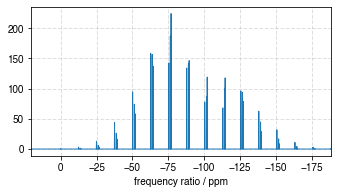

In [7]:
x, y = sim_wollastonite.run(method=one_d_spectrum)
plot(x,y)
plt.show()